# Q.1 

1. What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

We use the interval scale to measure any time series data. A time series is continuous when observations are made continuously through time. A time series is discrete when observations are taken at specific times.

# Q.2.

2. What does ARIMA stand for? Break down and explain each piece in the name.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. 
- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

# Q.3.

3. Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from pprint import pprint
import seaborn as sns
import statistics
import math
from scipy import stats
temp_df = pd.read_csv("temperature.csv",parse_dates=True, index_col='datetime')
temp_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [2]:
def Kelvin_to_Celsius(city,scale='C'):
    """Function converts the the df temp in Kelvin to Celsius"""
    try:
        if scale == 'C':
            city = city - 273.15
        else:
            print("Scale should be Celsius(C)")
    except Exception as e:
        print(e)
    return city

In [3]:
temp_df_cel = pd.DataFrame(index=temp_df.index) #make new dataframe for celsius values

for col in temp_df.columns:
    temp_df_cel[col] = Kelvin_to_Celsius(temp_df[col],scale='C')

In [16]:
temp_df_cel.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941867,16.310618,8.639833,18.712845,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697789,14.081672,34.241513,31.131841,37.261539,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700441,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


# Q.4

Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [5]:
temp_df_cel_interpolate= temp_df.interpolate(limit_area='inside')
print(temp_df_cel_interpolate.isna().sum().sum())
print(temp_df_cel.isna().sum().sum())
print(temp_df_cel_interpolate['Albuquerque'].isna())
print(temp_df_cel['Albuquerque'].isna())

temp_df_cel['Albuquerque']

7955
8030
datetime
2012-10-01 12:00:00     True
2012-10-01 13:00:00    False
2012-10-01 14:00:00    False
2012-10-01 15:00:00    False
2012-10-01 16:00:00    False
                       ...  
2017-11-29 20:00:00    False
2017-11-29 21:00:00    False
2017-11-29 22:00:00    False
2017-11-29 23:00:00    False
2017-11-30 00:00:00    False
Name: Albuquerque, Length: 45253, dtype: bool
datetime
2012-10-01 12:00:00     True
2012-10-01 13:00:00    False
2012-10-01 14:00:00    False
2012-10-01 15:00:00    False
2012-10-01 16:00:00    False
                       ...  
2017-11-29 20:00:00    False
2017-11-29 21:00:00    False
2017-11-29 22:00:00    False
2017-11-29 23:00:00    False
2017-11-30 00:00:00    False
Name: Albuquerque, Length: 45253, dtype: bool


datetime
2012-10-01 12:00:00          NaN
2012-10-01 13:00:00    11.970000
2012-10-01 14:00:00    12.004558
2012-10-01 15:00:00    12.083952
2012-10-01 16:00:00    12.163345
                         ...    
2017-11-29 20:00:00    12.570000
2017-11-29 21:00:00    13.300000
2017-11-29 22:00:00    13.290000
2017-11-29 23:00:00    12.990000
2017-11-30 00:00:00    11.550000
Name: Albuquerque, Length: 45253, dtype: float64

# Q.5.

Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [6]:
temp_df_cel_interpolate['month']= pd.DatetimeIndex(temp_df_cel_interpolate.index).month
temp_df_cel_interpolate

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN,10
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5,10
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5,10
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5,10
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,...,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN,11
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,...,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN,11
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,...,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN,11


In [7]:
x=temp_df_cel_interpolate
summer_months= [5,6,7,8,9]
winter_months=[10,11,12,1,2,3,4]
x[x.month.isin(summer_months)]

#Calculated averages for cities during summer months.
avg_summer = x[x.month.isin(summer_months)].iloc[:,0:36].mean().round(2)


In [8]:
#Calculated averages for cities during winter months.
avg_winter =x[x.month.isin(winter_months)].iloc[:,0:36].mean().round(2)


In [9]:
#created dataframe with the average values and cities
average_df=pd.DataFrame(avg_summer)
average_df.columns=['summer_avg']
average_df['winter_avg']=avg_winter
average_df=average_df.reset_index()
average_df.columns=['city','summer_avg','winter_avg']
average_df

,city,summer_avg,winter_avg
0,Vancouver,289.82,279.67
1,Portland,291.13,280.80
2,San Francisco,291.35,285.91
3,Seattle,289.99,280.60
4,Los Angeles,294.74,288.19
5,San Diego,293.54,287.94
6,Las Vegas,301.84,286.00
7,Phoenix,303.80,289.82
8,Albuquerque,293.69,280.10
9,Denver,291.44,276.97


In [10]:
#Iterated inside the average df and compared which the city temp is greater in summer and for the same city temp 
#is less than in winter and print the results.
cityA=[]
cityB=[]

for i in range(len(average_df['city'])):
    city=average_df.iloc[i,0]
    summer_temp=average_df.iloc[i,1]
    winter_temp=average_df.iloc[i,2]
    for j in range(len(average_df['city'])):
        if city!=average_df.iloc[j,0]:
            if (summer_temp>average_df.iloc[j,1]) & (winter_temp<average_df.iloc[j,2]):
                cityA.append(city)
                cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is colder than ",average_df.iloc[j,0],average_df.iloc[j,2])

Las Vegas  temperature  301.84  is hotter than  Los Angeles 294.74
Las Vegas  temperature  286.0  is colder than  Los Angeles 288.19
Las Vegas  temperature  301.84  is hotter than  San Diego 293.54
Las Vegas  temperature  286.0  is colder than  San Diego 287.94
Las Vegas  temperature  301.84  is hotter than  San Antonio 300.04
Las Vegas  temperature  286.0  is colder than  San Antonio 289.51
Las Vegas  temperature  301.84  is hotter than  Dallas 300.17
Las Vegas  temperature  286.0  is colder than  Dallas 287.05
Las Vegas  temperature  301.84  is hotter than  Houston 300.21
Las Vegas  temperature  286.0  is colder than  Houston 290.1
Las Vegas  temperature  301.84  is hotter than  Jacksonville 299.49
Las Vegas  temperature  286.0  is colder than  Jacksonville 290.81
Las Vegas  temperature  301.84  is hotter than  Miami 300.84
Las Vegas  temperature  286.0  is colder than  Miami 296.31
Las Vegas  temperature  301.84  is hotter than  Beersheba 297.04
Las Vegas  temperature  286.0  is col

# Q.6.

For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

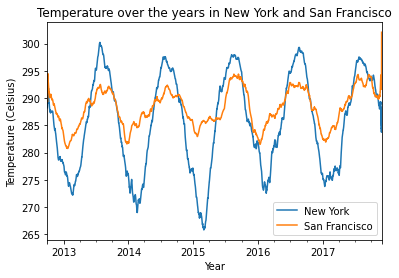

In [11]:
temp_df_cel_interpolate[["New York","San Francisco"]].rolling('30D').mean().plot(title="Temperature over the years in New York and San Francisco")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()



Rolling average takes average of the data points within a selected window. In the above case a window of 30 calendar days was selected to calculate average temperature, for the specified city and year.

Moving average model is used for future prediction using time series analysis. When the output data is linearly dependent on the past and present values, we need to use the moving average model. Because of this MA model assumes equal weights for all data points unlike the rolling average.


# Q.7.

Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.

In [12]:
#Taking five cities after the comparison
sarima_df = temp_df_cel.loc[:,['Los Angeles','Atlanta','Seattle','Houston','Chicago']]

In [13]:
#importing neccessary modules for sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [14]:
import warnings
warnings.filterwarnings('ignore')


                                     SARIMAX Results                                      
Dep. Variable:                   diff_Los Angeles   No. Observations:                45233
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -90384.963
Date:                            Sat, 11 Dec 2021   AIC                         180785.925
Time:                                    14:01:03   BIC                         180855.680
Sample:                                         0   HQIC                        180807.878
                                          - 45233                                         
Covariance Type:                           approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0046      0.005   -213.380      0.000      -1.014      -0.995
ar.L2         -0.7676      0.007   

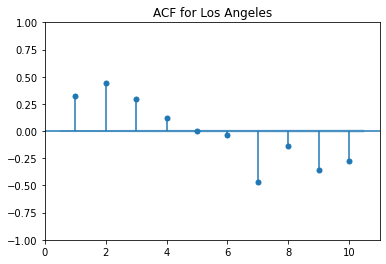

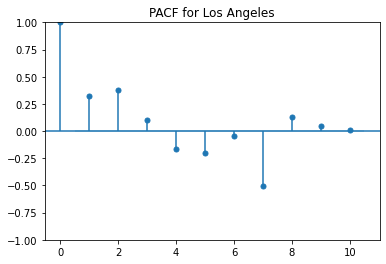

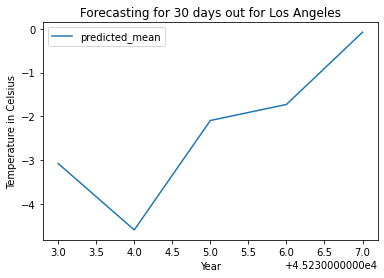

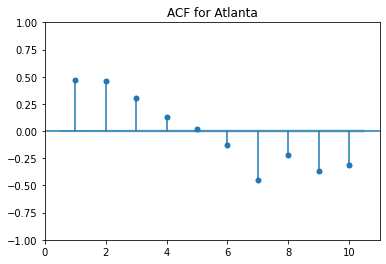

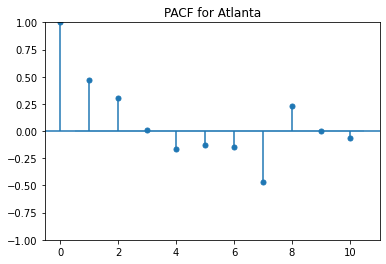

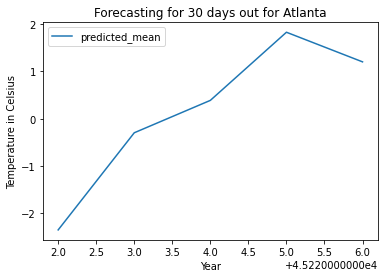

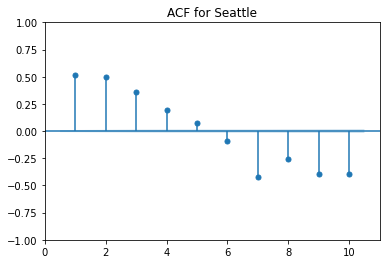

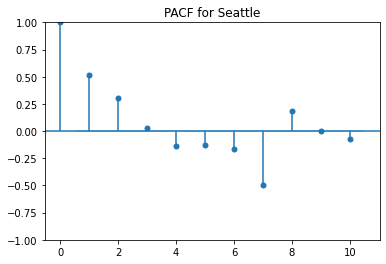

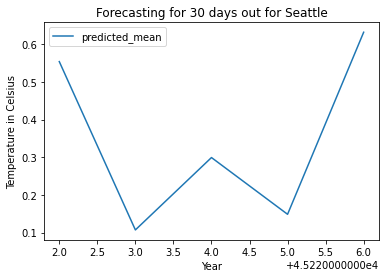

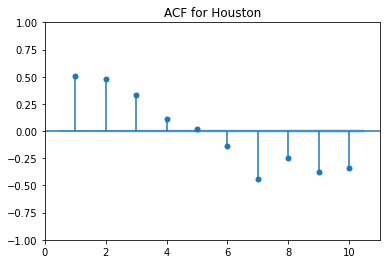

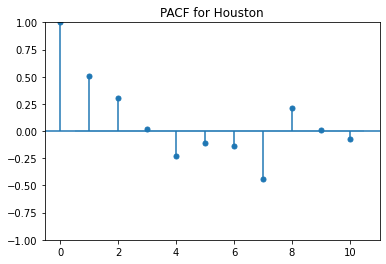

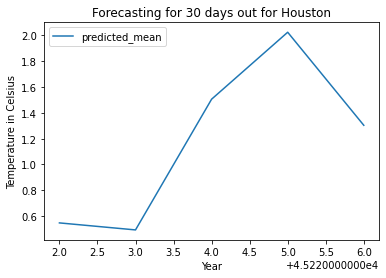

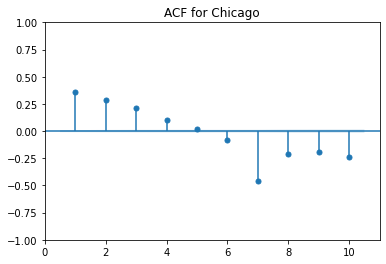

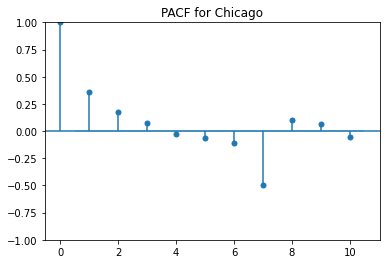

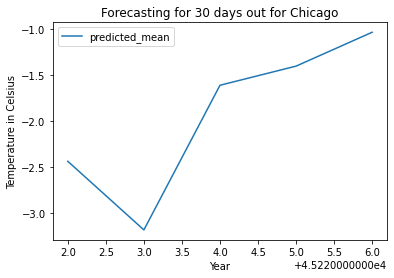

In [15]:
sarima_diff=sarima_df.copy(deep=False)

for i in sarima_df:
    #converting non stationary into stationary by taking seasonal and non seasonal difference
    #sarima_df[i].plot()
    sarima_diff["diff_"+i]=sarima_df[i].diff().diff(7).dropna()
    sarima_diff=sarima_diff.dropna()
    #plotting acf,pacf
    plot_acf(sarima_diff[["diff_"+i]],zero=False,lags=10,missing='drop',title="ACF for "+i);
    plot_pacf(sarima_diff[["diff_"+i]],lags=10,method='ywm',title="PACF for "+i);
    #creating SARIMA model
    model=SARIMAX(sarima_diff["diff_"+i],order=(5,1,0),seasonal_order=(2,1,0,12))
    fitting_model=model.fit(low_memory=True)
    print(fitting_model.summary())
    #forecasting for next 30 days
    forecast_df=pd.DataFrame(fitting_model.forecast(steps=5))
    forecast_df.plot()
    plt.title("Forecasting for 30 days out for "+i)
    plt.xlabel('Year')
    plt.ylabel('Temperature in Celsius')



# Q.8.

Explain what you see when you perform results.summary() on the cities in question 7. 


The coefficient column represents the numeric values with constant and coefficients. Second column contains the standard errors it's a measure of how far away on average the models predictions are from the true values. Z column contains test statistics for significance with the p-values. The last two columns represent the critical values for the 95% confidence interval

ARIMA(5,1,0)(2,1,0,12) model: The coefficients of AR is less than 1 ,the sum of the coefficients of the AR terms is less than one.

AIC(Akaike information criterion) is used to find which model is best. If we have small AIC value, then that is our model.Compare to other methods which I have tried, this model AIC values are less and log likelihood value is high. This seems to be a good model

BIC(Bayesian information criterion ) is a criterion for model selection among a finite set of models. When comparing the BIC and AIC, penalty for additional parameters is more in BIC than AIC.

Hannan–Quinn information criterion (HQIC) is an alternative to (AIC) and (BIC).

